# Differential expression analysis of TMT labeled proteome data using Limma's moderated t-test
## searched with MaxQuant v.1.6.10.43 with unitprot reviewed mouse DB, without isoforms, with PIF cutoff (0.75) and iBAQ calculation enabled

### Author: Konstantin Kahnert
### Date: 2020_09_10

After the initial data processing and anlysis, we continue with the differential expression protein analysis.  
In this script we will:

- use the moderated t-test of the limma package to determine significantly differentially expressed proteins

## Load required libraries

In [1]:
library(limma)
library(qvalue)
library(stringr)

## Load function from Kammers et al. 2015 ("Detecting significant changes in protein abundance", doi: 10.1016/j.euprot.2015.02.002)

In [2]:
source("http://www.biostat.jhsph.edu/~kkammers/software/eupa/source.functions.r")

## Load data

In [3]:
path_input <- file.path("E:/Data/Heart_failure_mice_CS/Sinus_node/Proteome/Analysis/canonical/w_PIF/03_diff_expr_analysis/",
                        "df_proteingroups_log_median subtraction_norm.csv")

data_raw <- read.csv(path_input)


## Define treatment and control groups for two group comparison, assuming 5 cases and 5 controls


In [4]:
ct <- c("Sham.1", "Sham.2", "Sham.3", "Sham.4", "Sham.5")
tr <- c("TAC.1", "TAC.2", "TAC.3", "TAC.4", "TAC.5")

## Define design according to syntax of limma package

In [5]:
design <- model.matrix(~factor(c(1,1,1,1,1,2,2,2,2,2))) # first five samples control, next five case

colnames(design) <- c("Intercept", "Diff")
design

,Intercept,Diff
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,1
7,1,1
8,1,1
9,1,1
10,1,1


## Fit linear model and determine differentially expressed proteins

In [6]:
res.eb <- eb.fit(data_raw[, c(ct, tr)], design)
head(res.eb)

,logFC,t.ord,t.mod,p.ord,p.mod,q.ord,q.mod,df.r,df.0,s2.0,s2,s2.post
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
267,0.7530576,13.116925,10.503238,1.085120e-06,3.762635e-07,0.003132121,0.001095581,8,3.23412,0.02425799,0.008240098,0.01285139
1081,0.8040662,8.218661,8.202437,3.594532e-05,4.488652e-06,0.022076792,0.006534893,8,3.23412,0.02425799,0.023928831,0.02402359
2546,0.6543534,8.322931,7.714244,3.280774e-05,8.122415e-06,0.022076792,0.007117341,8,3.23412,0.02425799,0.015452977,0.01798780
5962,2.5411947,6.465233,7.565960,1.951378e-04,9.777441e-06,0.022076792,0.007117341,8,3.23412,0.02425799,0.386231319,0.28202510
407,-0.6493444,-7.528260,-7.218775,6.745093e-05,1.524707e-05,0.022076792,0.007165375,8,3.23412,0.02425799,0.018599490,0.02022848
1709,-0.6700499,-7.200831,-7.078954,9.237553e-05,1.830973e-05,0.022076792,0.007165375,8,3.23412,0.02425799,0.021646565,0.02239835


## Plot volcano plots for ordinary and moderated p-values

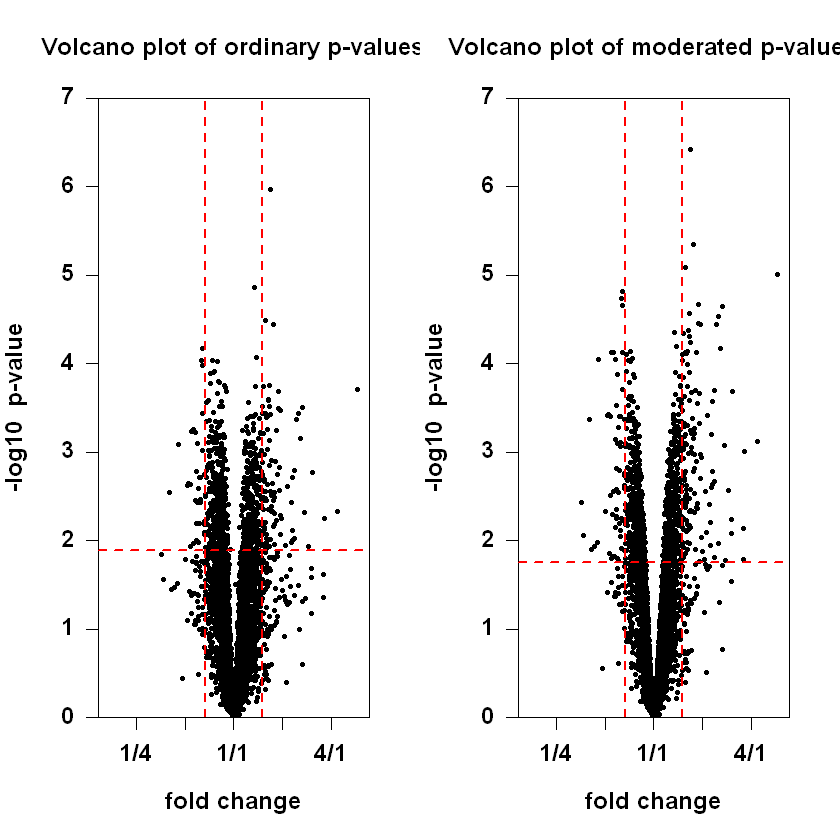

In [7]:
rx <- c(-1, 1)*max(abs(res.eb$logFC))*1.1
ry <- c(0, ceiling(max(-log10(res.eb$p.ord), -log10(res.eb$p.mod))))

par(mfrow=c(1,2), font.lab=2, cex.lab=1.2, font.axis=2, cex.axis=1.2)
par(las=1, xaxs="i", yaxs="i")

# ordinary p-values
plot(res.eb$logFC, -log10(res.eb$p.ord), pch=20, bg="black", cex=0.9, 
     xlim=rx, ylim=ry, xaxt="n",
     xlab="fold change", ylab="-log10  p-value")
abline(h=1.88515, col="red", lty="dashed",lwd=2)
abline(v=c(-0.58496, 0.58496), col="red", lty="dashed",lwd=2)
axis(1, seq(-2,2,1), paste(c("1/4","1/2","1/1","2/1","4/1")))
title("Volcano plot of ordinary p-values")

# moderated p-values
plot(res.eb$logFC, -log10(res.eb$p.mod), pch=20, bg="black", cex=0.9,
     xlim=rx, ylim=ry, xaxt="n",
     xlab="fold change", ylab="-log10  p-value")
abline(h=1.7504, col="red", lty="dashed", lwd=2)
abline(v=c(-0.58496, 0.58496), col="red", lty="dashed",lwd=2)
axis(1, seq(-2,2,1), paste(c("1/4","1/2","1/1","2/1","4/1")))
title("Volcano plot of moderated p-values")


## Sort dataframes by index


In [8]:
res.eb$index <- as.numeric(row.names(res.eb))
res.eb <- res.eb[order(res.eb$index), ]

data_raw$index <- as.numeric(row.names(data_raw))
data_raw <- data_raw[order(data_raw$index), ]

## Combine dataframes

In [9]:
df_combined <- merge(res.eb, data_raw)

head(df_combined)

,index,logFC,t.ord,t.mod,p.ord,p.mod,q.ord,q.mod,df.r,df.0,...,Potential.contaminant,id,Peptide.IDs,Peptide.is.razor,Mod..peptide.IDs,Evidence.IDs,MS.MS.IDs,Best.MS.MS,Oxidation..M..site.IDs,Oxidation..M..site.positions
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,...,<lgl>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,-0.28758709,-2.5337682,-2.6288796,0.035049187,0.0230930365,0.07246915,0.053878934,8,3.23412,...,NA,0,6069;8344;8870;13813;19817;31684;39687,True;True;True;True;True;True;True,6333;8706;9250;9251;14422;20662;33317;41657,17467;17468;24091;25559;25560;25561;25562;25563;25564;25565;25566;25567;40328;56548;56549;87417;87418;109011;109012,11890;16386;17364;17365;17366;17367;17368;27682;38853;60572;75514,11890;16386;17367;27682;38853;60572;75514,0,352
2,2,0.91848556,6.0116684,6.5915829,0.000319218,0.0000353275,0.02207679,0.007165375,8,3.23412,...,NA,2,8075,True,8429,23393,15915,15915,,
3,3,0.09950036,0.5027768,0.5680314,0.628667647,0.5811892017,0.35110886,0.339813584,8,3.23412,...,NA,3,6875;9957;9997;19846;21301;24900;30715;32041;32245;32685,True;True;True;True;False;True;True;False;False;False,7170;10392;10433;20691;22201;25922;32320;33686;33896;34344,20019;20020;28865;28866;29007;56623;60447;60448;60449;69686;85151;88386;88818;88819;88820;89782;89783;89784,13630;13631;19648;19649;19743;38911;41620;41621;41622;48121;59030;61276;61558;61559;62246,13630;19649;19743;38911;41621;48121;59030;61276;61558;62246,,
4,4,0.09755184,1.3937320,1.2307885,0.200894847,0.2435490916,0.18490131,0.205969082,8,3.23412,...,NA,6,1341;5441;7396;8665;18925;19306;20141;20260;24903;26528;27066;31648;31649;33617;33718;39443;39997;42480,True;True;True;True;True;True;True;True;True;True;True;True;True;True;True;True;True;True,1410;5671;7705;9037;19738;20132;20991;21113;25925;27764;28468;28469;33281;33282;35314;35419;41400;41982;44564,4183;15524;21501;24914;54064;55057;57365;57366;57709;57710;69691;74084;74085;74086;74087;75745;75746;75747;75748;87328;87329;92349;92586;108328;108329;109838;116346,2828;10467;14620;16921;37137;37807;39463;39709;48126;51198;52392;52393;52394;60515;60516;64010;64168;75031;76093;80639,2828;10467;14620;16921;37137;37807;39463;39709;48126;51198;52393;60515;60516;64010;64168;75031;76093;80639,2,1
5,5,0.27182456,0.9539343,1.1040737,0.368047785,0.2926483213,0.25995179,0.228082367,8,3.23412,...,NA,7,23613,True,24599,66471,45851,45851,,
6,6,-0.02880012,-0.1558658,-0.1749278,0.880000066,0.8642492959,0.42060872,0.420349396,8,3.23412,...,NA,8,4582,True,4779,13344,8963,8963,,


In [10]:
head(df_combined)

,index,logFC,t.ord,t.mod,p.ord,p.mod,q.ord,q.mod,df.r,df.0,...,Potential.contaminant,id,Peptide.IDs,Peptide.is.razor,Mod..peptide.IDs,Evidence.IDs,MS.MS.IDs,Best.MS.MS,Oxidation..M..site.IDs,Oxidation..M..site.positions
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,...,<lgl>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,-0.28758709,-2.5337682,-2.6288796,0.035049187,0.0230930365,0.07246915,0.053878934,8,3.23412,...,NA,0,6069;8344;8870;13813;19817;31684;39687,True;True;True;True;True;True;True,6333;8706;9250;9251;14422;20662;33317;41657,17467;17468;24091;25559;25560;25561;25562;25563;25564;25565;25566;25567;40328;56548;56549;87417;87418;109011;109012,11890;16386;17364;17365;17366;17367;17368;27682;38853;60572;75514,11890;16386;17367;27682;38853;60572;75514,0,352
2,2,0.91848556,6.0116684,6.5915829,0.000319218,0.0000353275,0.02207679,0.007165375,8,3.23412,...,NA,2,8075,True,8429,23393,15915,15915,,
3,3,0.09950036,0.5027768,0.5680314,0.628667647,0.5811892017,0.35110886,0.339813584,8,3.23412,...,NA,3,6875;9957;9997;19846;21301;24900;30715;32041;32245;32685,True;True;True;True;False;True;True;False;False;False,7170;10392;10433;20691;22201;25922;32320;33686;33896;34344,20019;20020;28865;28866;29007;56623;60447;60448;60449;69686;85151;88386;88818;88819;88820;89782;89783;89784,13630;13631;19648;19649;19743;38911;41620;41621;41622;48121;59030;61276;61558;61559;62246,13630;19649;19743;38911;41621;48121;59030;61276;61558;62246,,
4,4,0.09755184,1.3937320,1.2307885,0.200894847,0.2435490916,0.18490131,0.205969082,8,3.23412,...,NA,6,1341;5441;7396;8665;18925;19306;20141;20260;24903;26528;27066;31648;31649;33617;33718;39443;39997;42480,True;True;True;True;True;True;True;True;True;True;True;True;True;True;True;True;True;True,1410;5671;7705;9037;19738;20132;20991;21113;25925;27764;28468;28469;33281;33282;35314;35419;41400;41982;44564,4183;15524;21501;24914;54064;55057;57365;57366;57709;57710;69691;74084;74085;74086;74087;75745;75746;75747;75748;87328;87329;92349;92586;108328;108329;109838;116346,2828;10467;14620;16921;37137;37807;39463;39709;48126;51198;52392;52393;52394;60515;60516;64010;64168;75031;76093;80639,2828;10467;14620;16921;37137;37807;39463;39709;48126;51198;52393;60515;60516;64010;64168;75031;76093;80639,2,1
5,5,0.27182456,0.9539343,1.1040737,0.368047785,0.2926483213,0.25995179,0.228082367,8,3.23412,...,NA,7,23613,True,24599,66471,45851,45851,,
6,6,-0.02880012,-0.1558658,-0.1749278,0.880000066,0.8642492959,0.42060872,0.420349396,8,3.23412,...,NA,8,4582,True,4779,13344,8963,8963,,


## Save combined dataframe as csv file

In [11]:
path_output <- paste(str_replace(path_input, ".csv", ""), "_empBayes_pvals.csv")
write.csv(df_combined, file=path_output, row.names=FALSE, col.names=TRUE)

Warning message in write.csv(df_combined, file = path_output, row.names = FALSE, :
"attempt to set 'col.names' ignored"
